<a href="https://colab.research.google.com/github/9-coding/TensorFlow/blob/main/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-89ed494554bf>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


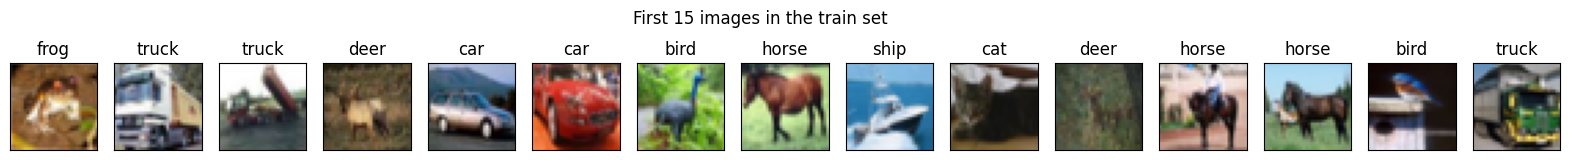

<ipython-input-3-89ed494554bf>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(label[i])])


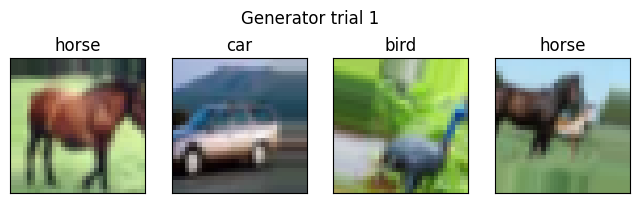

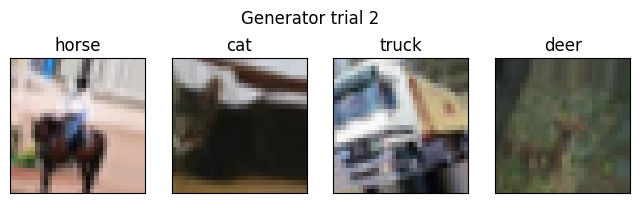

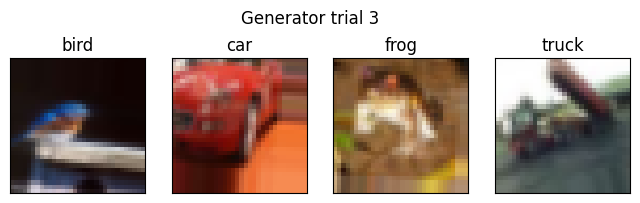

In [3]:
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
x_train=x_train.astype('float32')
x_train/=255
# 앞 15개에 대해서만 증강 허용
x_train=x_train[0:15,]
y_train=y_train[0:15,]
class_names=['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20,2))
plt.suptitle("First 15 images in the train set")
for i in range(15):
  plt.subplot(1, 15, i+1)
  plt.imshow(x_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.title(class_names[int(y_train[i])])
plt.show()

batch_size=4
generator=ImageDataGenerator(rotation_range=20.0, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
gen=generator.flow(x_train, y_train, batch_size=batch_size) # x_train에서 증강, 미니 배치 크기 설정.

for a in range(3):
  img, label = gen.next() # 데이터 증강 및 생성해 img와 labeldp wjwkd
  plt.figure(figsize=(8, 2.4))
  plt.suptitle("Generator trial "+str(a+1))
  for i in range(batch_size):
    plt.subplot(1, batch_size, i+1)
    plt.imshow(img[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(class_names[int(label[i])])
  plt.show()